### Notebook 2: Using K Means Clustering to Group Scotches Together

In this notebook I explore using KMeans Clustering to see if I can group similar scotches together for use as a means for recommendation. It might be able to simplify my work if I end up with a good number of groups, then folks can choose which group they are interested in. 

Import the needed libraries here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Import the dataset:

In [2]:
scotches = pd.read_csv('data/whisky.csv')
scotches.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


Drop the RowID, Postcode, Latitude, and Longitude columns, since I only want to use flavor characteristics to group the scotches.

In [3]:
scotches = scotches.drop(['RowID', 'Postcode', 'Latitude', 'Longitude'], axis=1)
scotches.head(2)

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2


For this clustering analysis, I plan to use the "elbow" method to figure out the optimum number of clusters, and I'll use the inertia and silhouette methods to do that. 

In [6]:
#set up my X
X = scotches.drop('Distillery', axis=1)
X_scaled = StandardScaler().fit_transform(X)

In [7]:
X_scaled.shape

(86, 12)

In [12]:
#I'm going to start by using inertia as my evaluation metric first
inertia = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

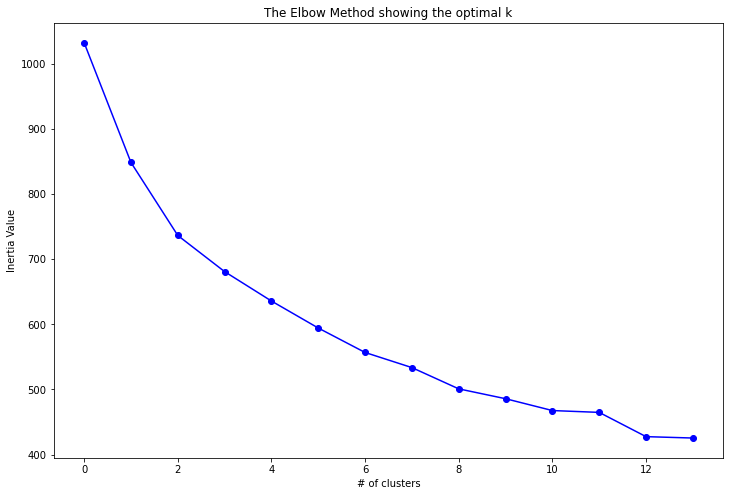

In [13]:
#plot inertia using the elbow method
plt.figure(figsize=(12,8))
plt.plot(inertia, 'bx-', marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia Value')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the inertia scores, it seems I might have a large range in the number of clusters I could use. I'm still seeing improvement up to 10 clusters, with the largest jumpes in improvement happening in the 2-3 range.

In [14]:
#now I'll use silhouette score to evaluate
silhouette = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

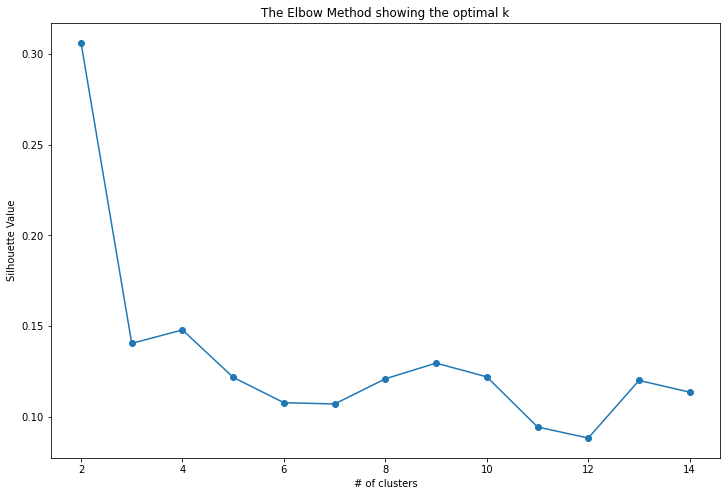

In [15]:
plt.figure(figsize=(12,8))
plt.plot(range(2, 15), silhouette, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette Value')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In using the silhouette score, I might use ~3-4 clusters to group the data, since higher scores are better and the score continues to decrease after 4 clusters.

Let me run the model using 3 clusters, then take a look at the groupings to see if their flavor profiles make sense. Then I'll do the same with 4 clusters.

In [16]:
kmeans3 = KMeans(n_clusters=3, random_state=123)
kmeans3.fit(X_scaled)

KMeans(n_clusters=3, random_state=123)

In [19]:
#going to make variables of these attributes:
labels3 = kmeans3.labels_
centroids3 = kmeans3.cluster_centers_
intertia3 = kmeans3.inertia_

In [20]:
silhouette_score(X_scaled, labels3, metric='euclidean')

0.1404626259248636

In [22]:
scotches['labels'] = labels3
scotches.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,0
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,0
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,2
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,1
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,0


In [25]:
#let me see where the smokiest scotches ended up
smoky = scotches[scotches['Smoky'] > 3]
smoky

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,1
21,Caol Ila,3,1,4,2,1,0,2,0,2,1,1,1,1
57,Lagavulin,4,1,4,4,1,0,1,2,1,1,1,0,1
58,Laphroig,4,2,4,4,1,0,0,1,1,1,0,0,1


In [ ]:
#it looks like the smokiest scotches all got grouped into label 1

In [26]:
#let me see where the Medicinal scotches ended up
medi = scotches[scotches['Medicinal'] > 3]
medi

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,1
57,Lagavulin,4,1,4,4,1,0,1,2,1,1,1,0,1
58,Laphroig,4,2,4,4,1,0,0,1,1,1,0,0,1


In [ ]:
#it looks like they also ended up in label 1

I'd like to look at some of these visually and see which scotches get grouped together.

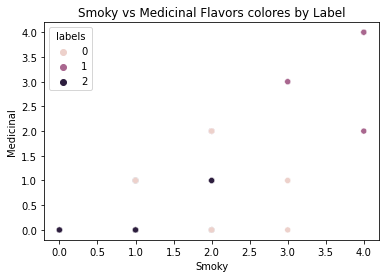

In [41]:
sns.scatterplot(x=scotches['Smoky'], y=scotches['Medicinal'], hue= scotches['labels'])
plt.title('Smoky vs Medicinal Flavors colored by Label');

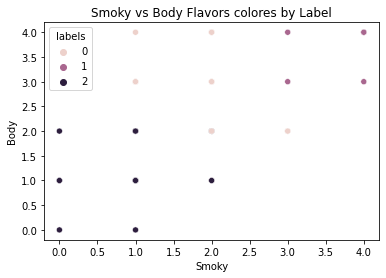

In [42]:
sns.scatterplot(x=scotches['Smoky'], y=scotches['Body'], hue= scotches['labels'])
plt.title('Smoky vs Body Flavors colored by Label');

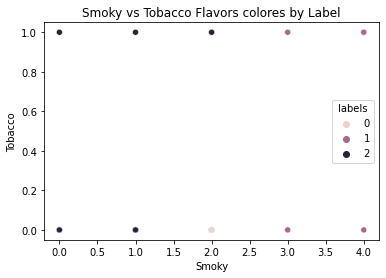

In [43]:
sns.scatterplot(x=scotches['Smoky'], y=scotches['Tobacco'], hue= scotches['labels'])
plt.title('Smoky vs Tobacco Flavors colored by Label');

In [27]:
#tobacco doesn't seem to be present much. It's max value is 1, meaning nothing is strongly tobacco-flavored.

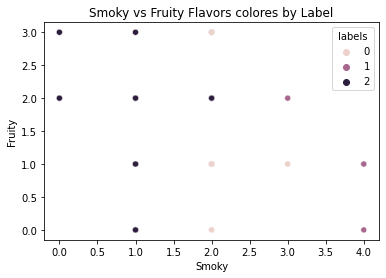

In [46]:
sns.scatterplot(x=scotches['Smoky'], y=scotches['Fruity'], hue= scotches['labels'])
plt.title('Smoky vs Fruity Flavors colored by Label');

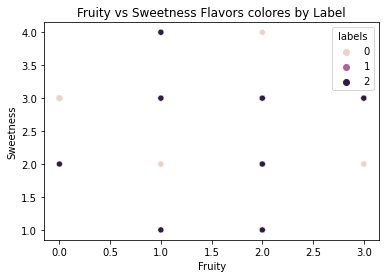

In [47]:
sns.scatterplot(x=scotches['Fruity'], y=scotches['Sweetness'], hue= scotches['labels'])
plt.title('Fruity vs Sweetness Flavors colored by Label');

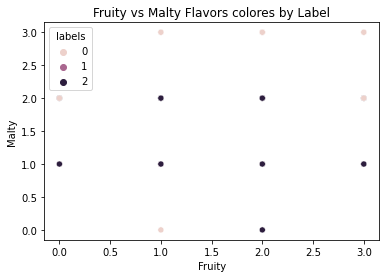

In [48]:
sns.scatterplot(x=scotches['Fruity'], y=scotches['Malty'], hue= scotches['labels'])
plt.title('Fruity vs Malty Flavors colored by Label');

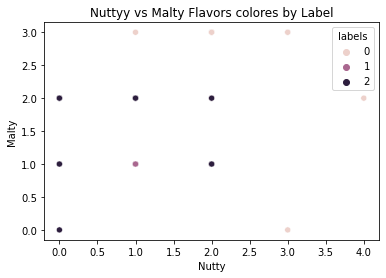

In [49]:
sns.scatterplot(x=scotches['Nutty'], y=scotches['Malty'], hue= scotches['labels'])
plt.title('Nutty vs Malty Flavors colored by Label');

In [50]:
scotch_mini = scotches.drop('Distillery', axis = 1)

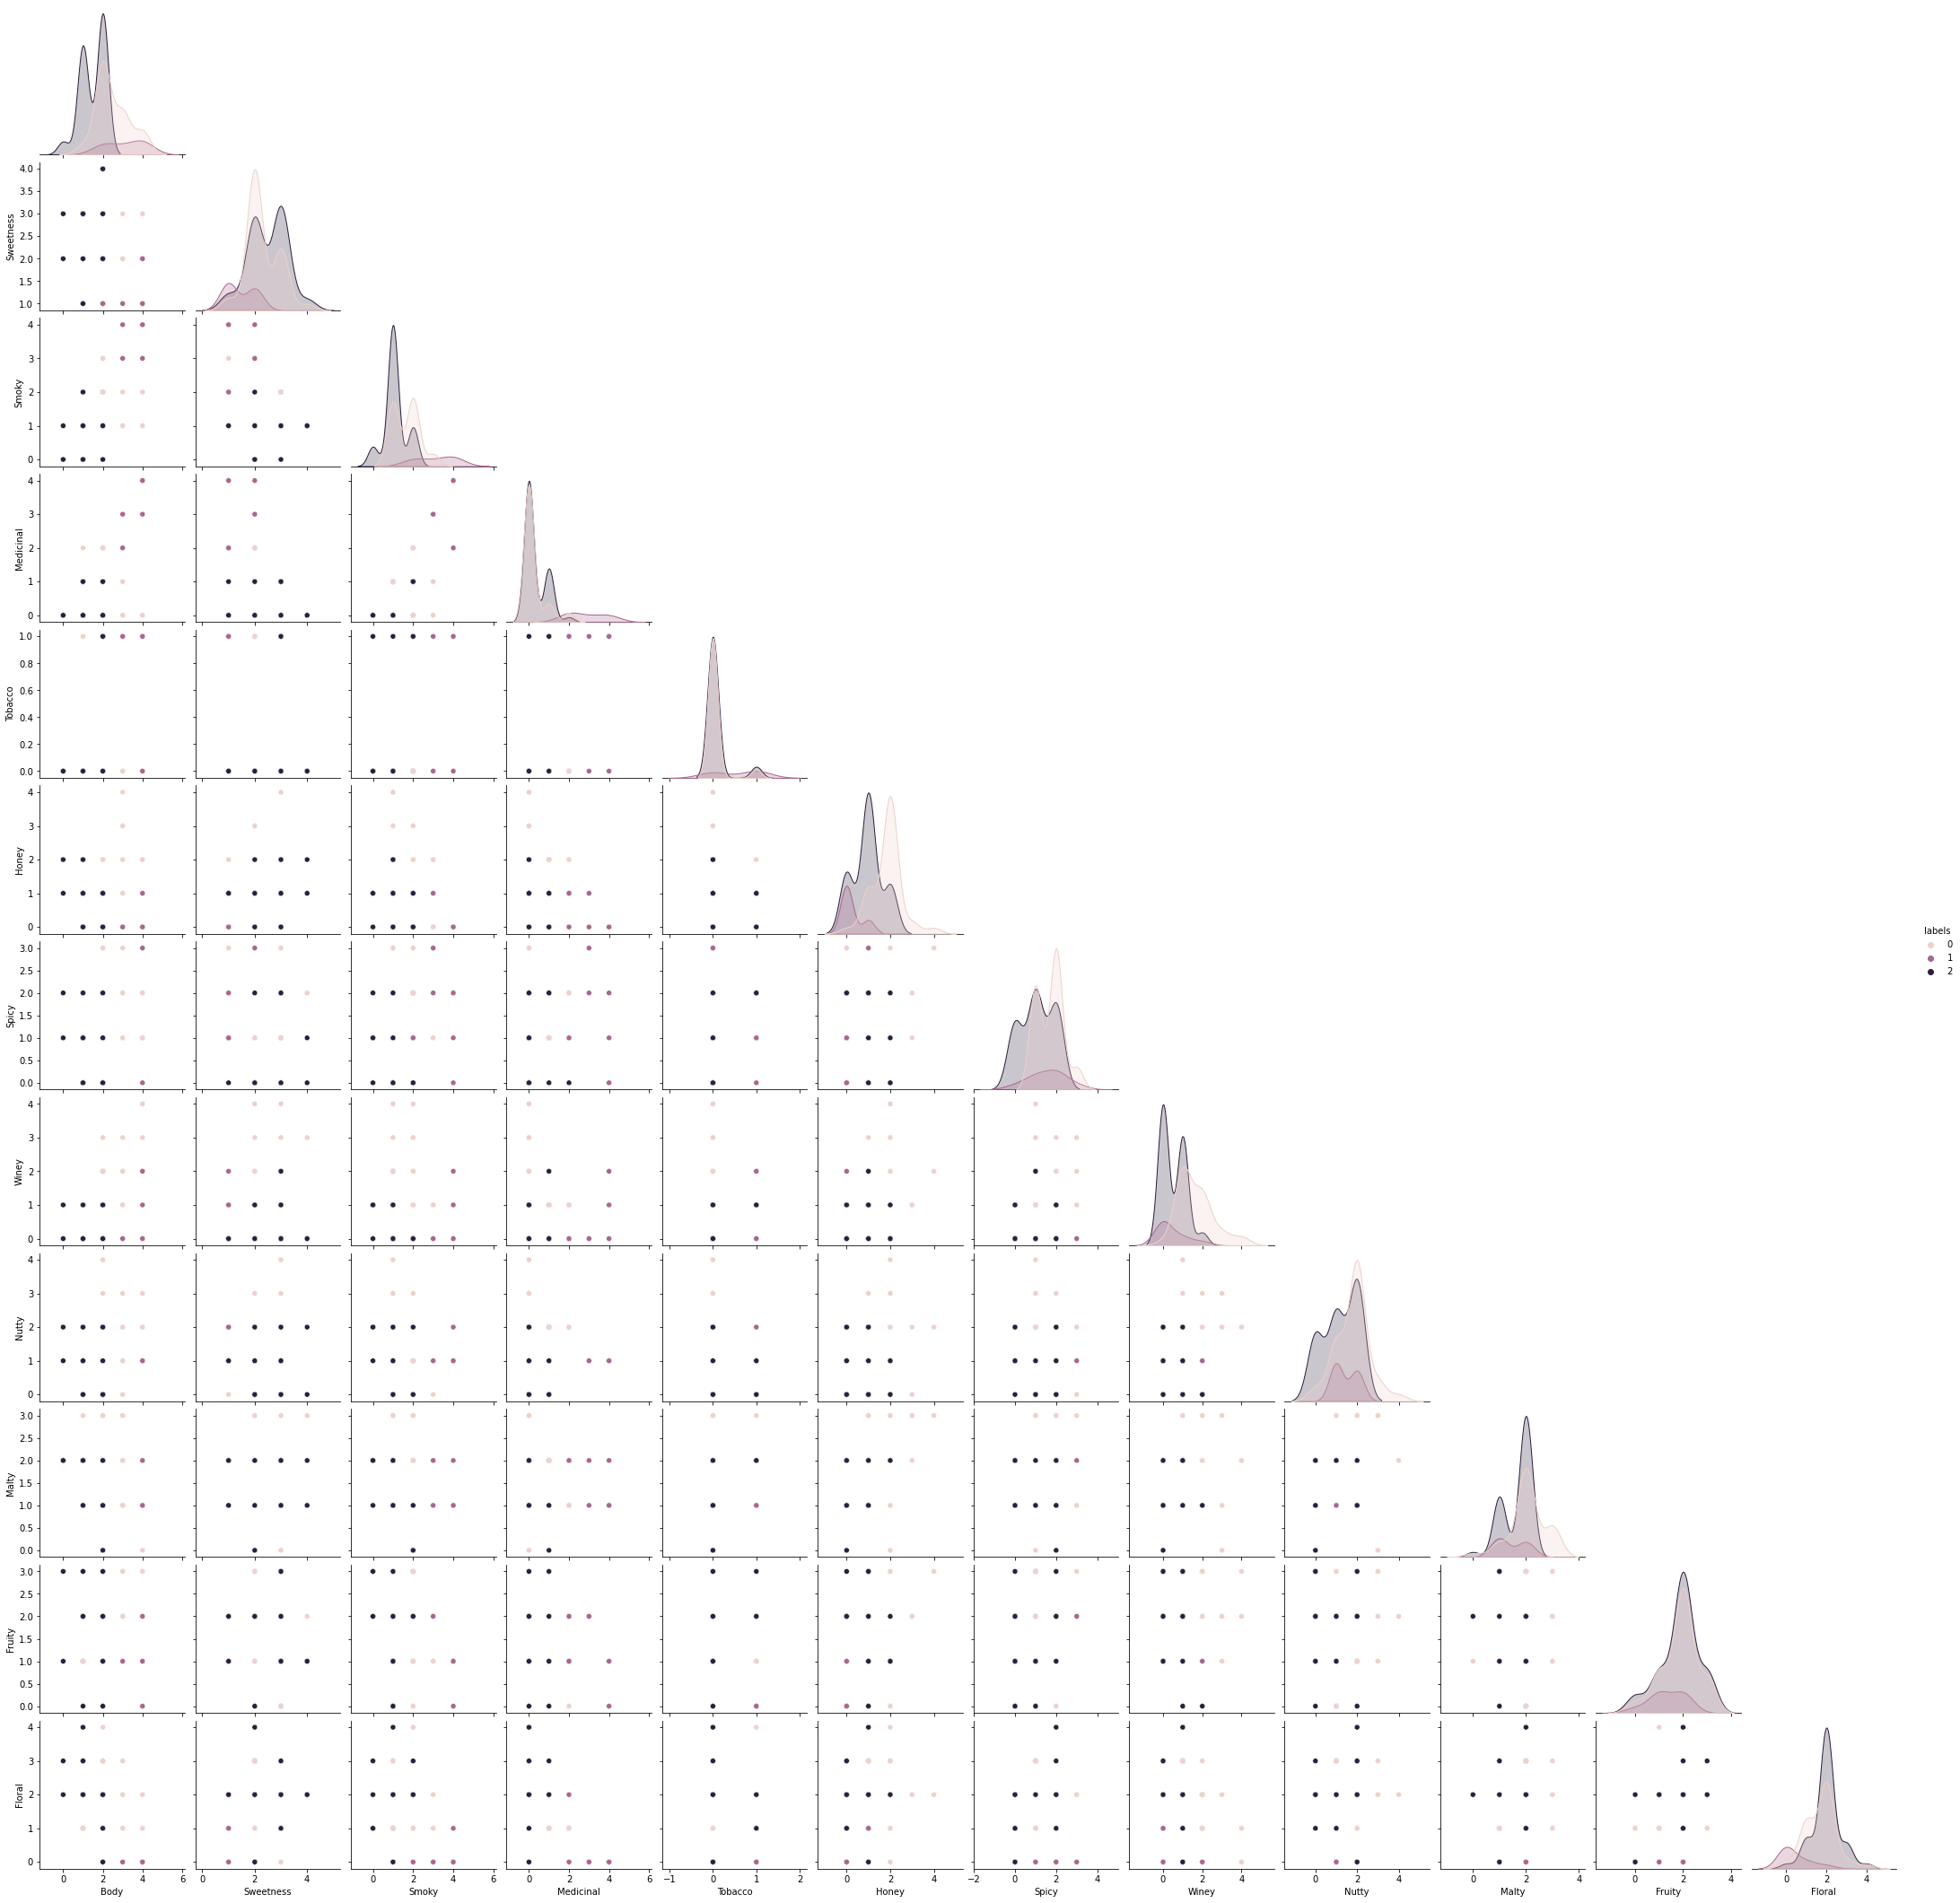

In [28]:
sns.pairplot(scotch_mini, hue='labels', corner=True)

In examining the three clusters, it seems like the following categories get some good separation: Smoky, Medicinal, Winey, Nutty, and Body. There are still many of the flavors that don't really stand out much. For example, Tobacco flavor isn't really a differentiator in any scotch, as the maximum value is 1 (as opposed to 4 for smoky, body, medicinal).

Before moving on to testing 4 clusters, I want to see if I can recap what each label entails using the 3-cluster model.

In [52]:
#Label 0
label3_0 = scotches[scotches['labels'] == 0]
label3_0.head(15)
#okay label 0 is the Fruity/Floral/Nutty/Sweetness but with lots of flavor; very low on the Medicinal/Smoky Flavors

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,0
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,0
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,0
7,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,0
10,Balmenach,4,3,2,0,0,2,1,3,3,0,1,2,0
11,Belvenie,3,2,1,0,0,3,2,1,0,2,2,2,0
12,BenNevis,4,2,2,0,0,2,2,0,2,2,2,2,0
14,Benrinnes,3,2,2,0,0,3,1,1,2,3,2,2,0
15,Benromach,2,2,2,0,0,2,2,1,2,2,2,2,0
17,BlairAthol,2,2,2,0,0,1,2,2,2,2,2,2,0


In [53]:
#Label 1
label3_1 = scotches[scotches['labels'] == 1]
label3_1.head(15)
#okay label 1 is the high Medicinal/Smoky but with lots of Body/flavor; very low on the Fruity/Floral/Nutty/Sweetness Flavors

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,1
21,Caol Ila,3,1,4,2,1,0,2,0,2,1,1,1,1
23,Clynelish,3,2,3,3,1,0,2,0,1,1,2,0,1
55,Isle of Jura,2,1,2,2,0,1,1,0,2,1,1,1,1
57,Lagavulin,4,1,4,4,1,0,1,2,1,1,1,0,1
58,Laphroig,4,2,4,4,1,0,0,1,1,1,0,0,1
66,Oban,2,2,2,2,0,0,2,0,2,2,2,0,1
68,OldPulteney,2,1,2,2,1,0,1,1,2,2,2,2,1
77,Talisker,4,2,3,3,0,1,3,0,1,2,2,0,1


In [54]:
#Label 2
label3_2 = scotches[scotches['labels'] == 2]
label3_2.head(15)
#okay label 2 is the high Fruity/Floral flavors but with less Body/flavor; very low on the Fruity/Floral/Nutty/Sweetness Flavors

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,2
5,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,2
6,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,2
8,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,2
9,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,2
13,Benriach,2,2,1,0,0,2,2,0,0,2,3,2,2
16,Bladnoch,1,2,1,0,0,0,1,1,0,2,2,3,2
20,Bunnahabhain,1,2,1,1,0,1,1,1,1,2,2,3,2
22,Cardhu,1,3,1,0,0,1,1,0,2,2,2,2,2
25,Craigganmore,2,3,2,1,0,0,1,0,2,2,2,2,2


Now I'm going to test using 4 clusters and see how that goes.

In [55]:
kmeans4 = KMeans(n_clusters=4, random_state=123)
kmeans4.fit(X_scaled)

KMeans(n_clusters=4, random_state=123)

In [56]:
#going to make variables of these attributes:
labels4 = kmeans4.labels_
centroids4 = kmeans4.cluster_centers_
intertia4 = kmeans4.inertia_

In [57]:
silhouette_score(X_scaled, labels4, metric='euclidean')

0.14789841117378189

In [58]:
scotches4 = scotches.copy()
scotches4['labels'] = labels4
scotches4.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,2
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,1
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,3
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,2


In [59]:
#let's see where the smokiest scotches ended up
smoky4 = scotches4[scotches4['Smoky'] > 3]
smoky4

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,3
21,Caol Ila,3,1,4,2,1,0,2,0,2,1,1,1,3
57,Lagavulin,4,1,4,4,1,0,1,2,1,1,1,0,3
58,Laphroig,4,2,4,4,1,0,0,1,1,1,0,0,3


In [ ]:
#it looks like the smokiest scotches all got grouped into label 3

In [60]:
#let's see where the Medicinal scotches ended up
medi4 = scotches4[scotches4['Medicinal'] > 3]
medi4

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,3
57,Lagavulin,4,1,4,4,1,0,1,2,1,1,1,0,3
58,Laphroig,4,2,4,4,1,0,0,1,1,1,0,0,3


In [ ]:
#it looks like they also ended up in label 3

I'd like to look at some of these visually and see which scotches get grouped together.

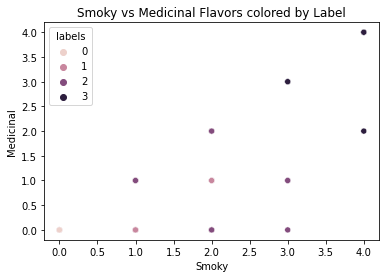

In [64]:
sns.scatterplot(x=scotches4['Smoky'], y=scotches4['Medicinal'], hue= scotches4['labels'])
plt.title('Smoky vs Medicinal Flavors colored by Label');

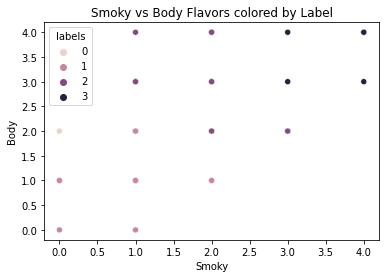

In [65]:
sns.scatterplot(x=scotches4['Smoky'], y=scotches4['Body'], hue= scotches4['labels'])
plt.title('Smoky vs Body Flavors colored by Label');

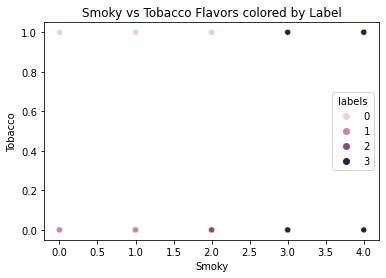

In [66]:
sns.scatterplot(x=scotches4['Smoky'], y=scotches4['Tobacco'], hue= scotches4['labels'])
plt.title('Smoky vs Tobacco Flavors colored by Label');

In [ ]:
#tobacco doesn't seem to be present much. It's max value is 1, meaning nothing is strongly tobacco-flavored.

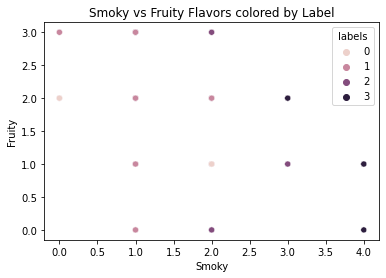

In [67]:
sns.scatterplot(x=scotches4['Smoky'], y=scotches4['Fruity'], hue= scotches4['labels'])
plt.title('Smoky vs Fruity Flavors colored by Label');

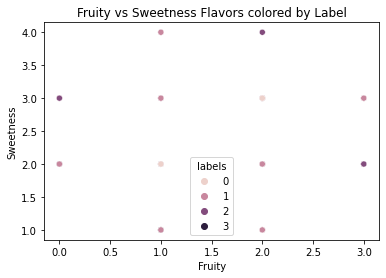

In [68]:
sns.scatterplot(x=scotches4['Fruity'], y=scotches4['Sweetness'], hue= scotches4['labels'])
plt.title('Fruity vs Sweetness Flavors colored by Label');

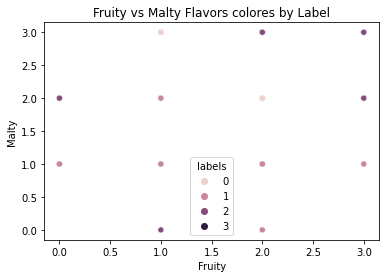

In [69]:
sns.scatterplot(x=scotches4['Fruity'], y=scotches4['Malty'], hue= scotches4['labels'])
plt.title('Fruity vs Malty Flavors colored by Label');

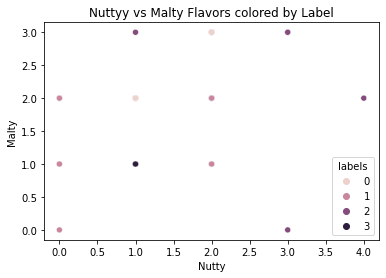

In [70]:
sns.scatterplot(x=scotches4['Nutty'], y=scotches4['Malty'], hue= scotches4['labels'])
plt.title('Nutty vs Malty Flavors colored by Label');

From these scatterplots, it seems that 4 clusters might be too many. Again, the Smoky, Medicinal, and Body flavor profiles have good separation, but the Fruity, Tobacco, Sweetness, Malty, and Nutty flavors don't have clear separation on the labels. I'm going to look at the labels next in more detail, but right now I think I'm favoring 3 clusters over 4.

In [71]:
#Label 0
label4_0 = scotches4[scotches4['labels'] == 0]
label4_0.head(15)
#label 0 here seems to be low/mild Body, 1 on the Tobacco, some Malty/Floral, low on Smoky/Medicinal

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
24,Craigallechie,2,2,2,0,1,2,2,1,2,2,1,4,0
32,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,0
67,OldFettercairn,1,2,2,0,1,2,2,1,2,3,1,1,0
68,OldPulteney,2,1,2,2,1,0,1,1,2,2,2,2,0
69,RoyalBrackla,2,3,2,1,1,1,2,1,0,2,3,2,0
85,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,0


In [72]:
#Label 1
label4_1 = scotches4[scotches4['labels'] == 1]
label4_1.head(15)
#label 1 is high on Sweetness, 0 on Tobacco, moderate/high on Fruity and Floral

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,1
5,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,1
6,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,1
8,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,1
9,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,1
13,Benriach,2,2,1,0,0,2,2,0,0,2,3,2,1
16,Bladnoch,1,2,1,0,0,0,1,1,0,2,2,3,1
20,Bunnahabhain,1,2,1,1,0,1,1,1,1,2,2,3,1
22,Cardhu,1,3,1,0,0,1,1,0,2,2,2,2,1
25,Craigganmore,2,3,2,1,0,0,1,0,2,2,2,2,1


In [73]:
#Label 2
label4_2 = scotches4[scotches4['labels'] == 2]
label4_2.head(15)
#label 2 is higher on Body, with lots of the Honey/Spicy/Winey flavors; some Nutty/Malty/Fruity flavor too

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,2
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,2
7,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,2
10,Balmenach,4,3,2,0,0,2,1,3,3,0,1,2,2
11,Belvenie,3,2,1,0,0,3,2,1,0,2,2,2,2
12,BenNevis,4,2,2,0,0,2,2,0,2,2,2,2,2
14,Benrinnes,3,2,2,0,0,3,1,1,2,3,2,2,2
15,Benromach,2,2,2,0,0,2,2,1,2,2,2,2,2
17,BlairAthol,2,2,2,0,0,1,2,2,2,2,2,2,2


In [74]:
#Label 3
label4_3 = scotches4[scotches4['labels'] == 3]
label4_3.head(15)
#label 3 is clearly where the high Body/Medicinal/Smoky flavors live

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,3
21,Caol Ila,3,1,4,2,1,0,2,0,2,1,1,1,3
23,Clynelish,3,2,3,3,1,0,2,0,1,1,2,0,3
57,Lagavulin,4,1,4,4,1,0,1,2,1,1,1,0,3
58,Laphroig,4,2,4,4,1,0,0,1,1,1,0,0,3
66,Oban,2,2,2,2,0,0,2,0,2,2,2,0,3
77,Talisker,4,2,3,3,0,1,3,0,1,2,2,0,3


I think after taking a look at the two different models I will go with the 3-cluster model and use those groupings to recommend scotches. I think the flavor profiles are a little bit clearer to distinguish in the 3 cluster model vs the 4. I'm going to export the final dataframe, including labels, to a new csv to use in my recommender app.

In [75]:
scotches.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,labels
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,0
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,0
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,2
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,1
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,0


In [76]:
scotches.to_csv('data/labeled_distilleries.csv')

In [97]:
pd.__version__

'1.0.5'

In [98]:
plt.__version__

AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'